## Function Optimzation Tutorial with Python


Find similar functionality to the Excel solver. This can assist finding max/min values for complex python functions 

In [3]:
from matplotlib.pyplot import *
import numpy as np

In [6]:
%matplotlib inline

-3.99999494965


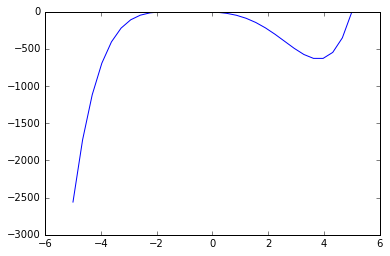

In [36]:
# http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

from scipy.optimize import minimize_scalar

x = np.linspace(-5,5,30)

f = lambda x: (x - 5) * (x + 1)**4
res = minimize_scalar(f, bounds=(-4, 2), method='bounded')# minimize_scalar(f, method='brent') 

print(res.x)
plot(x,f(x));

[-1.02986653]
[ -6.66133815e-16]


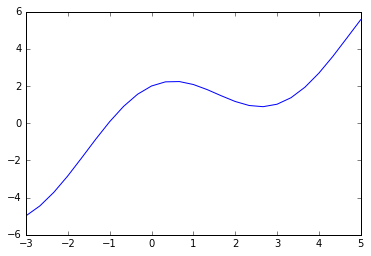

In [59]:
from scipy.optimize import root

def func(x):
    return x + 2 * np.cos(x)

sol = root(func, 0.3)

print(sol.x)

print(sol.fun)

x = np.linspace(-3,5,25)


plot(x, func(x));

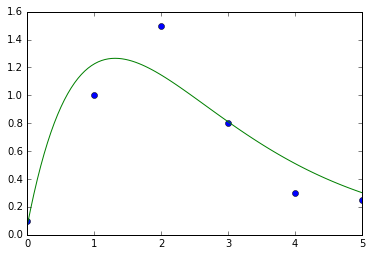

In [7]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy 
import numpy as np
X = np.array([0 ,   1 , 2 ,   3 ,   4 ,   5 ])
Y = np.array([0.1,  1 , 1.5 , 0.8 , 0.3 , 0.25 ])
fn = lambda a: (a[0]*X+a[1]) * np.exp(a[2]*X+a[3])
Sn = lambda x: np.sum( (fn(x)-Y)**2 )
A = scipy.optimize.fmin(func=Sn, x0=[0,0,0,0])
plt.plot(X, Y,'o')
xplot = np.linspace(0,5,100)
fnfit = lambda x,a: (a[0]*x+a[1]) * np.exp(a[2]*x+a[3])
plt.plot(xplot, fnfit(xplot, A))
plt.show()

`ftol` termination condition is satisfied.
Function evaluations 130, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.92e-08.


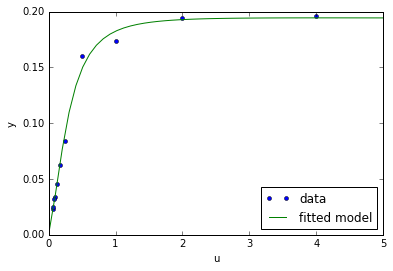

In [7]:
from scipy.optimize import least_squares

def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
    return model(x, u) - y


def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1, 8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)


res.x


import matplotlib.pyplot as plt
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plot(u, y, 'o', markersize=4, label='data')
plot(u_test, y_test, label='fitted model')
xlabel("u")
ylabel("y")
legend(loc='lower right')
show()

1.0


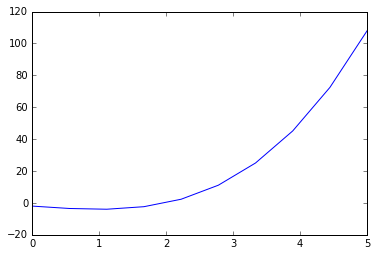

In [13]:
from scipy.optimize import minimize_scalar
f = lambda x: (x - 2) * (x + 1)**2
res = minimize_scalar(f, method='brent')
print(res.x)

z = np.linspace(0,5,10)
plot(z,f(z))

In [14]:
f(z)

array([  -2.        ,   -3.4951989 ,   -3.96159122,   -2.37037037,
          2.30727023,   11.10013717,   25.03703704,   45.14677641,
         72.45816187,  108.        ])

In [15]:
z

array([ 0.        ,  0.55555556,  1.11111111,  1.66666667,  2.22222222,
        2.77777778,  3.33333333,  3.88888889,  4.44444444,  5.        ])